In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ffipy import FFIEC_Client
from io import StringIO

In [6]:
all_banks_df = pd.read_csv('data/core_banks_dataset.csv', dtype='Int64')

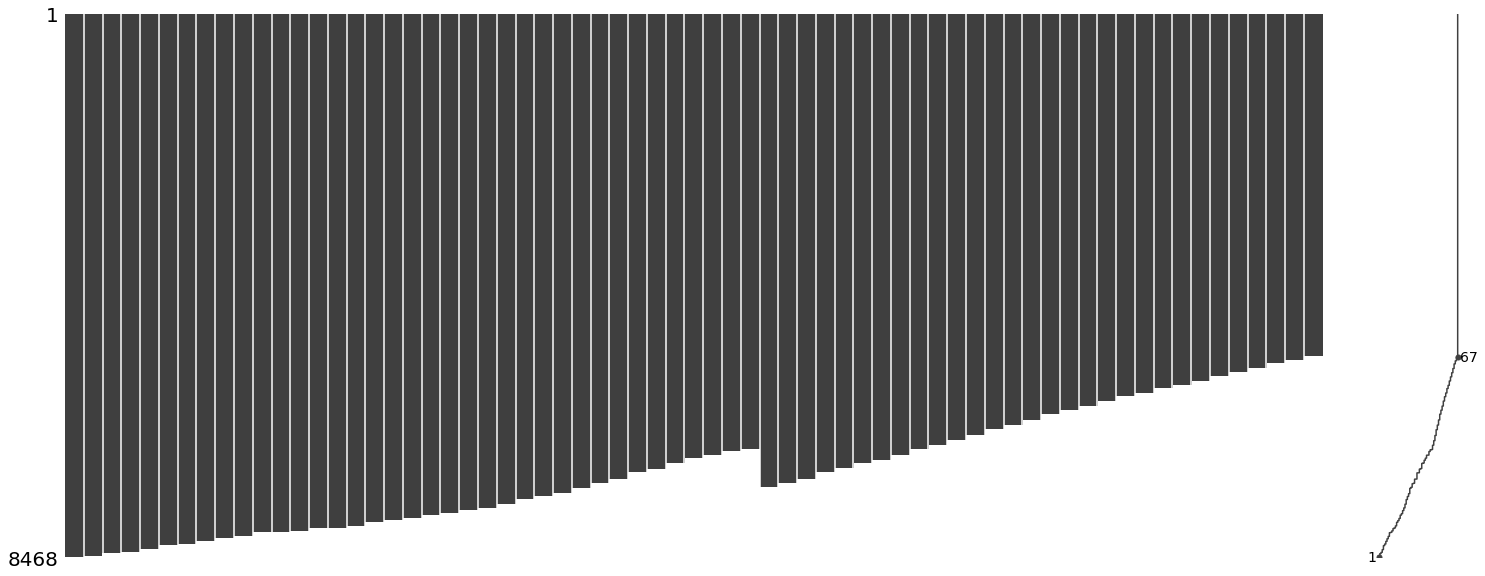

In [7]:
msno.matrix(all_banks_df)

In [10]:
client = FFIEC_Client()
report_periods = client.retrieve_ubpr_reporting_periods()
len(report_periods)

67

In [21]:
filers_bydate_dict = {}
count_bydate_dict = {}
for period in report_periods:
    filers_bydate =  client.retrieve_filers_since_date(ds_name='Call', 
                                                      reporting_pd_end=period, last_update_date=period)
    filers_bydate.sort()
    for filer in filers_bydate:
        
        if filer not in filers_bydate_dict.keys():
            filers_bydate_dict[filer] = [period]
        else:
            filers_bydate_dict[filer].append(period)
        #count_bydate_dict[period] = len(filers_bydate)

In [22]:
#filers_bydate_dict

In [25]:
bank_universe = pd.DataFrame.from_dict(filers_bydate_dict, orient='index')

In [27]:
bank_universe.to_csv('data/bank_universe.csv', index=False)